In [1]:
from preprocessing import Preprocessor
import os
import mne
import numpy as np
import pathlib

INPUT_DIR = pathlib.Path("C:\\Users\\최윤혁\\Desktop\\연구_2025\\0_EEG_Preprocessing\\EEG_Sandbox\\TESTFILES")
OUTPUT_DIR = pathlib.Path("C:\\Users\\최윤혁\\Desktop\\연구_2025\\0_EEG_Preprocessing\\EEG_Sandbox\\output_files")

def create_mock_files(input_dir, n_files):
    """
    Generates a set of fake, small EDF files for demonstration.
    """
    print(f"Creating {n_files} mock EDF files in '{input_dir}'...")
    os.makedirs(input_dir, exist_ok=True)
    
    sfreq = 250
    n_channels = 16
    duration_sec = 10
    n_samples = duration_sec * sfreq
    ch_names = [f'EEG {i+1}' for i in range(n_channels)]
    ch_types = ['eeg'] * n_channels
    
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
    
    for i in range(n_files):
        # Create fake data
        data = np.random.randn(n_channels, n_samples)
        # Add a big 60Hz sine wave to be filtered out
        t = np.arange(n_samples) / sfreq
        data += 5 * np.sin(2 * np.pi * 60 * t)
        
        raw_mock = mne.io.RawArray(data, info, verbose=False)
        
        # Save as EDF
        mock_file_path = os.path.join(input_dir, f"mock_eeg_{i+1:02d}.edf")
        raw_mock.export(mock_file_path, fmt='edf', overwrite=True, verbose=False)

mockPreprocessor = Preprocessor(pathlib.Path("C:\\Users\\최윤혁\\Desktop\\연구_2025\\0_EEG_Preprocessing\\EEGAPP\\example_config.yaml"))
mockPreprocessor.run_preprocessing()

2025-11-03 15:11:58,069 - INFO - Will process channel types: ['ecg', 'eeg']


=========== BATCH START ===========


100%|██████████| 2/2 [02:12<00:00, 66.22s/it] 
2025-11-03 15:14:10,687 - INFO - Preprocessing completed in 132.61 seconds.
2025-11-03 15:14:10,690 - INFO - Total time: 132.62s
2025-11-03 15:14:10,690 - INFO - Successfully processed: 2 files
2025-11-03 15:14:10,691 - INFO - Failed to process: 0 files
2025-11-03 15:14:10,692 - INFO - Processed files are in 'C:\Users\최윤혁\Desktop\연구_2025\0_EEG_Preprocessing\EEG_Sandbox\output_files'



=========== BATCH COMPLETE ===========


Extracting EDF parameters from C:\Users\최윤혁\Desktop\연구_2025\0_EEG_Preprocessing\EEG_Sandbox\TESTFILES\EEG1.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


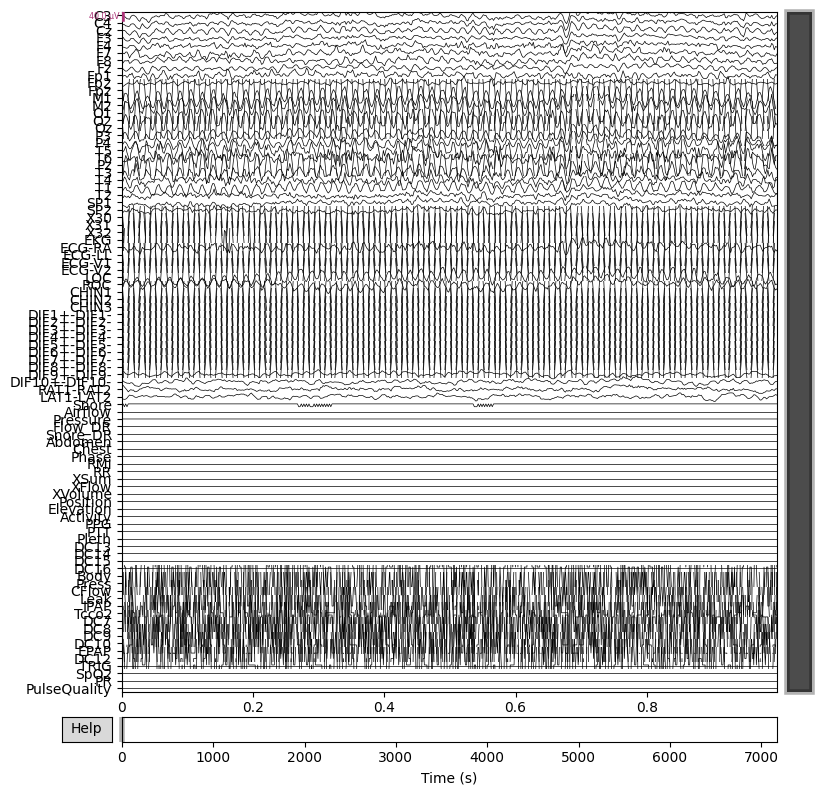

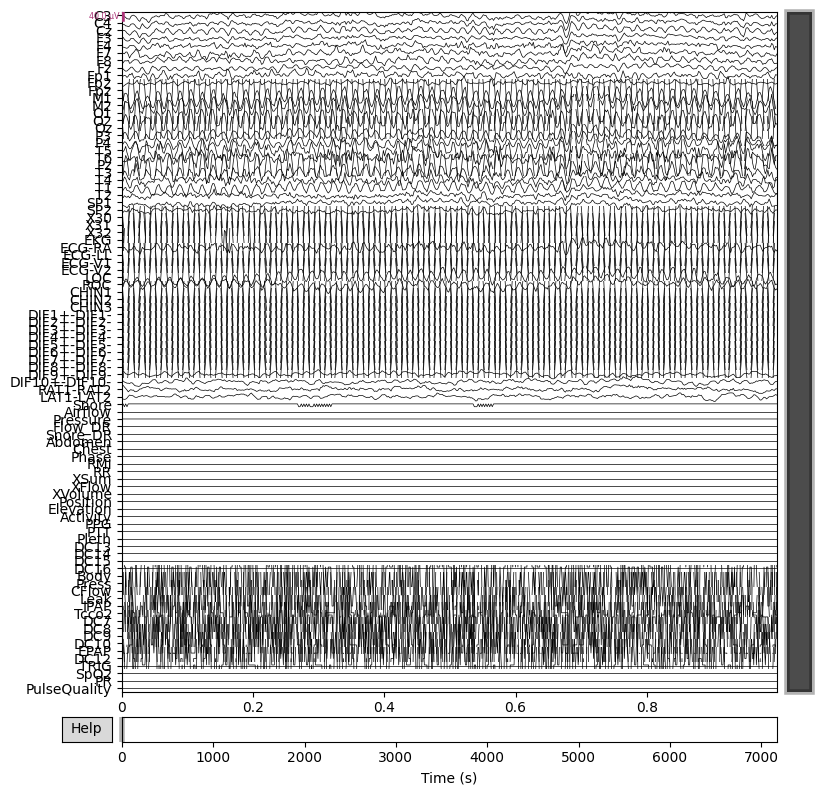

In [11]:
import numpy as np
from glob import glob
data_list = glob('C:\\Users\\최윤혁\\Desktop\\연구_2025\\0_EEG_Preprocessing\\EEG_Sandbox\\TESTFILES\\*.edf')
raw_unprocessed= mne.io.read_raw_edf(data_list[0])
raw_unprocessed.plot(duration=1, n_channels=100, scalings=0.00002)

Opening raw data file C:\Users\최윤혁\Desktop\연구_2025\0_EEG_Preprocessing\EEG_Sandbox\output_files\0\EEG1_processed.fif...
Isotrak not found


C:\Users\최윤혁\AppData\Local\Temp\ipykernel_15076\1390981742.py:4: RuntimeWarning: This filename (C:\Users\최윤혁\Desktop\연구_2025\0_EEG_Preprocessing\EEG_Sandbox\output_files\0\EEG1_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_processed= mne.io.read_raw_fif(data_list_processed[0])


    Range : 0 ... 1792499 =      0.000 ...  7169.996 secs
Ready.


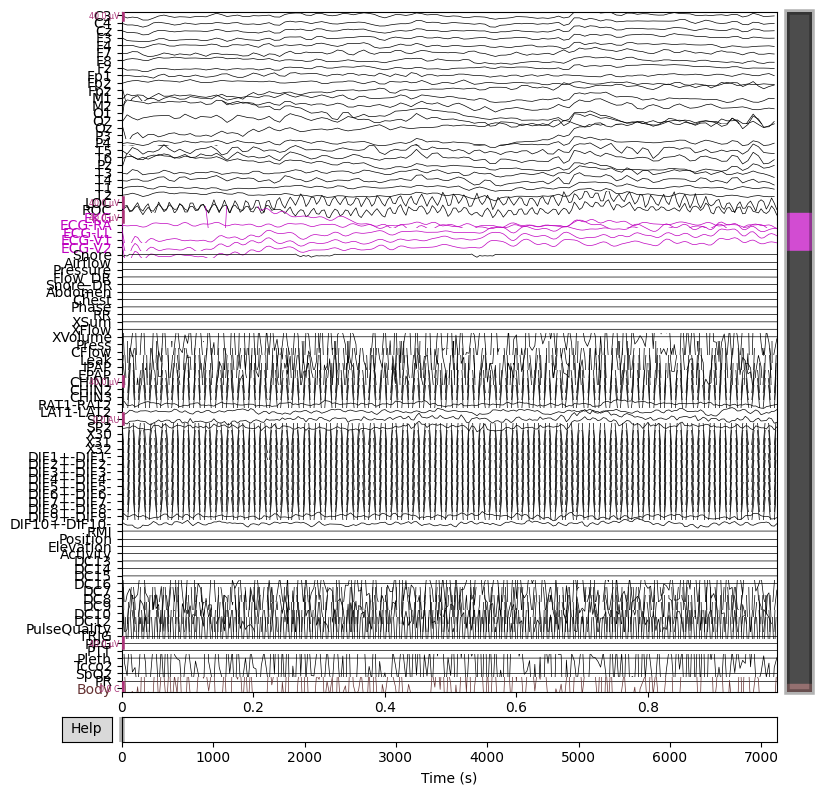

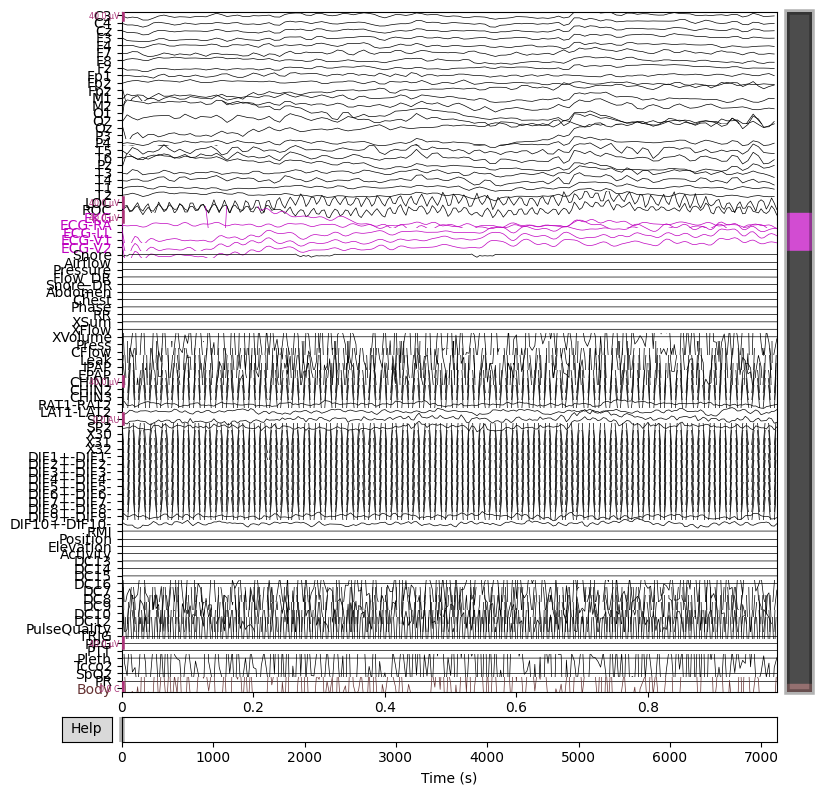

In [10]:
import numpy as np
from glob import glob
data_list_processed = glob('C:\\Users\\최윤혁\\Desktop\\연구_2025\\0_EEG_Preprocessing\\EEG_Sandbox\\output_files\\0\\*.fif')
raw_processed= mne.io.read_raw_fif(data_list_processed[0])
raw_processed.plot(duration=1, n_channels=100, scalings=0.00002)